# Customer Segmentation: Exploratory Data Analysis

This notebook contains an exploratory data analysis of the marketing campaign dataset to gain insights for customer segmentation.

## Setup and Data Loading

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
plt.style.use('seaborn-whitegrid')
sns.set_palette('colorblind')
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

/var/folders/qc/0kfkn55s1l54y40cndd1yk1h0000gn/T/ipykernel_31617/3608466563.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [12]:
# Load the dataset
df = pd.read_csv('../data/marketing_campaign.csv', sep=';')

# Display the first few rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Data Overview and Basic Statistics

In [13]:
# Check the shape of the dataset
print(f"Dataset dimensions: {df.shape[0]} rows and {df.shape[1]} columns")

Dataset dimensions: 2240 rows and 29 columns


In [14]:
# Get column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [15]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.00,5592.16,3246.66,0.00,2828.25,5458.50,8427.75,11191.00
Year_Birth,2240.00,1968.81,11.98,1893.00,1959.00,1970.00,1977.00,1996.00
Income,2216.00,52247.25,25173.08,1730.00,35303.00,51381.50,68522.00,666666.00
Kidhome,2240.00,0.44,0.54,0.00,0.00,0.00,1.00,2.00
Teenhome,2240.00,0.51,0.54,0.00,0.00,0.00,1.00,2.00
Recency,2240.00,49.11,28.96,0.00,24.00,49.00,74.00,99.00
MntWines,2240.00,303.94,336.60,0.00,23.75,173.50,504.25,1493.00
MntFruits,2240.00,26.30,39.77,0.00,1.00,8.00,33.00,199.00
MntMeatProducts,2240.00,166.95,225.72,0.00,16.00,67.00,232.00,1725.00
MntFishProducts,2240.00,37.53,54.63,0.00,3.00,12.00,50.00,259.00


## Missing Values Analysis

In [16]:
# Check for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

missing_df = pd.concat([missing_values, missing_percent], axis=1, keys=['Missing Values', 'Missing Percentage'])
missing_df = missing_df[missing_df['Missing Values'] > 0]
missing_df

,Missing Values,Missing Percentage
Income,24,1.07


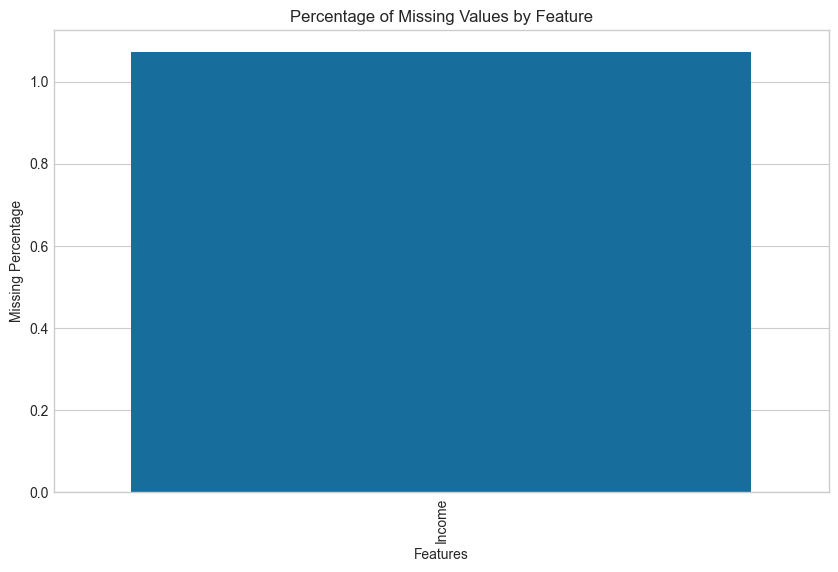

In [17]:
# Visualize missing values
if missing_df.shape[0] > 0:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_df.index, y='Missing Percentage', data=missing_df)
    plt.title('Percentage of Missing Values by Feature')
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Missing Percentage')
    plt.show()
else:
    print("No missing values in the dataset.")

## Categorical Data Analysis

In [18]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

# If we want to include additional columns that represent categories but are stored as integers
potential_categorical = ['Education', 'Marital_Status'] 
categorical_cols.extend([col for col in potential_categorical if col in df.columns])

Categorical columns: ['Education', 'Marital_Status', 'Dt_Customer']


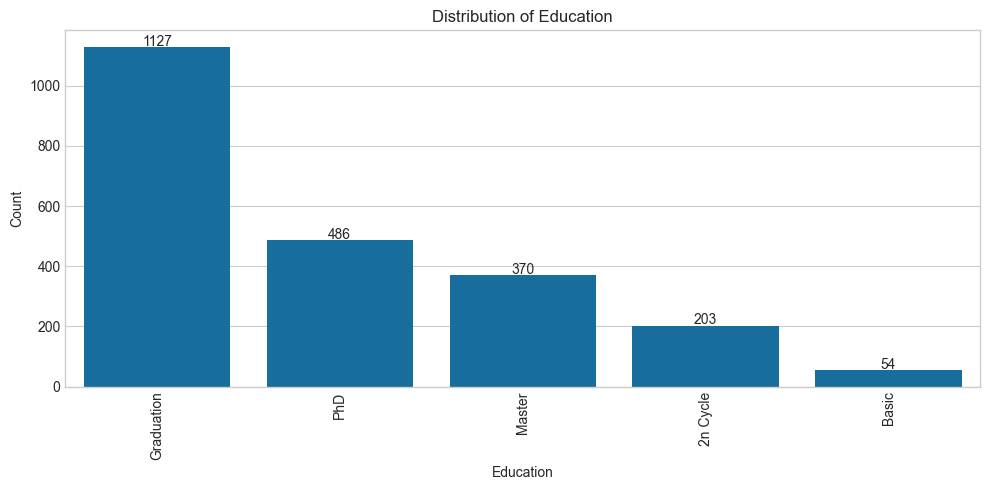

Percentage distribution of Education:
Graduation: 50.31%
PhD: 21.70%
Master: 16.52%
2n Cycle: 9.06%
Basic: 2.41%

--------------------------------------------------



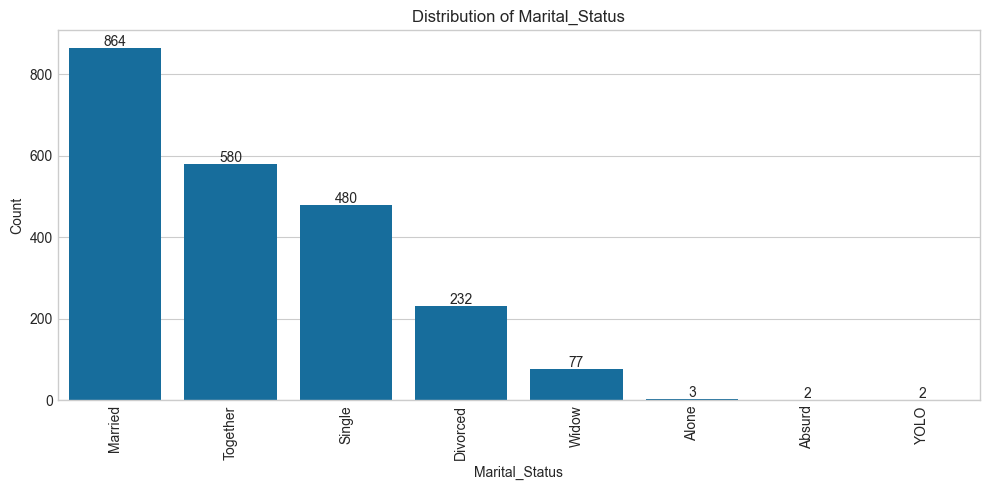

Percentage distribution of Marital_Status:
Married: 38.57%
Together: 25.89%
Single: 21.43%
Divorced: 10.36%
Widow: 3.44%
Alone: 0.13%
Absurd: 0.09%
YOLO: 0.09%

--------------------------------------------------



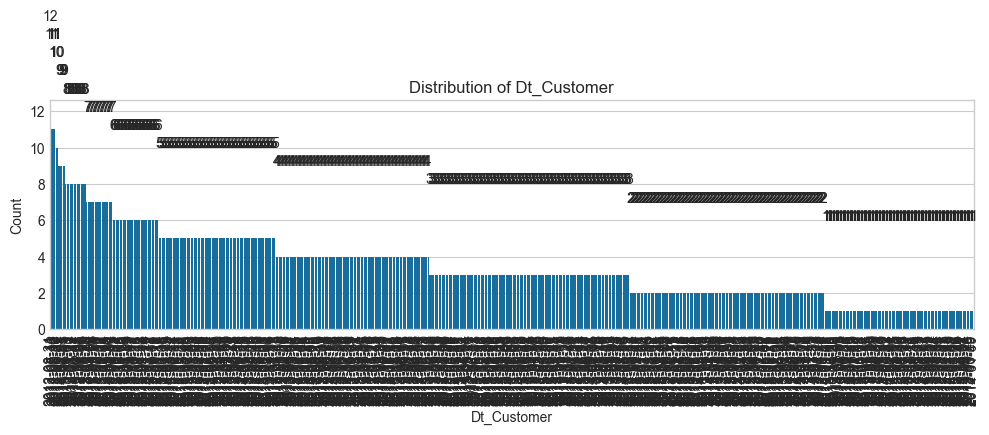

Percentage distribution of Dt_Customer:
2012-08-31: 0.54%
2013-02-14: 0.49%
2014-05-12: 0.49%
2012-09-12: 0.49%
2013-08-20: 0.45%
2014-05-22: 0.45%
2013-01-02: 0.40%
2012-10-29: 0.40%
2014-03-01: 0.40%
2014-03-23: 0.40%
2014-04-05: 0.40%
2013-05-11: 0.36%
2013-06-03: 0.36%
2012-11-03: 0.36%
2012-11-23: 0.36%
2013-01-12: 0.36%
2012-08-22: 0.36%
2014-05-11: 0.36%
2013-08-31: 0.36%
2013-11-07: 0.36%
2012-08-17: 0.36%
2013-10-28: 0.36%
2012-11-09: 0.36%
2013-04-05: 0.36%
2014-05-23: 0.36%
2012-08-29: 0.36%
2013-10-25: 0.31%
2013-02-20: 0.31%
2013-01-16: 0.31%
2014-05-02: 0.31%
2012-08-08: 0.31%
2014-01-26: 0.31%
2013-08-07: 0.31%
2013-02-16: 0.31%
2013-02-13: 0.31%
2014-03-17: 0.31%
2013-10-02: 0.31%
2013-05-22: 0.31%
2013-01-10: 0.31%
2013-10-04: 0.31%
2013-04-13: 0.31%
2013-11-23: 0.31%
2014-03-30: 0.31%
2013-06-04: 0.31%
2014-02-07: 0.31%
2014-04-13: 0.27%
2013-03-03: 0.27%
2012-09-22: 0.27%
2012-10-04: 0.27%
2012-10-13: 0.27%
2013-10-08: 0.27%
2012-09-08: 0.27%
2012-11-13: 0.27%
2013-1

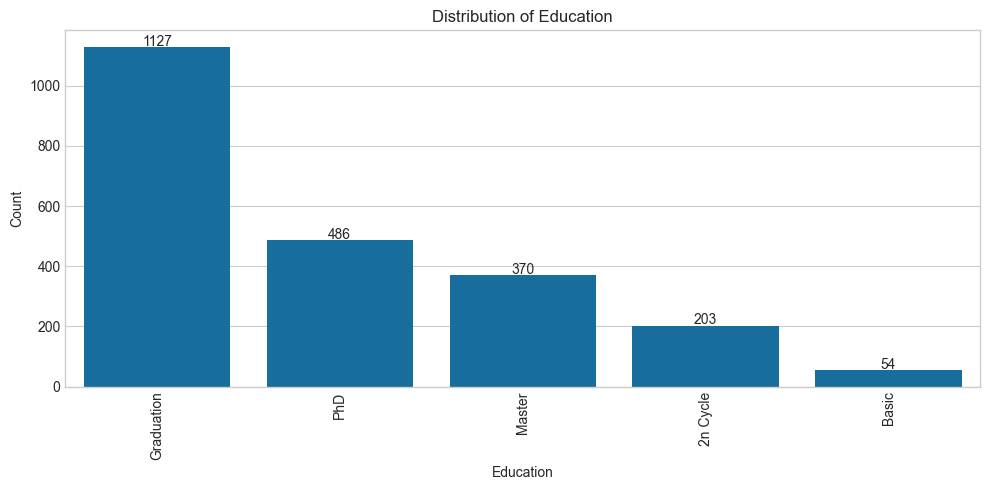

Percentage distribution of Education:
Graduation: 50.31%
PhD: 21.70%
Master: 16.52%
2n Cycle: 9.06%
Basic: 2.41%

--------------------------------------------------



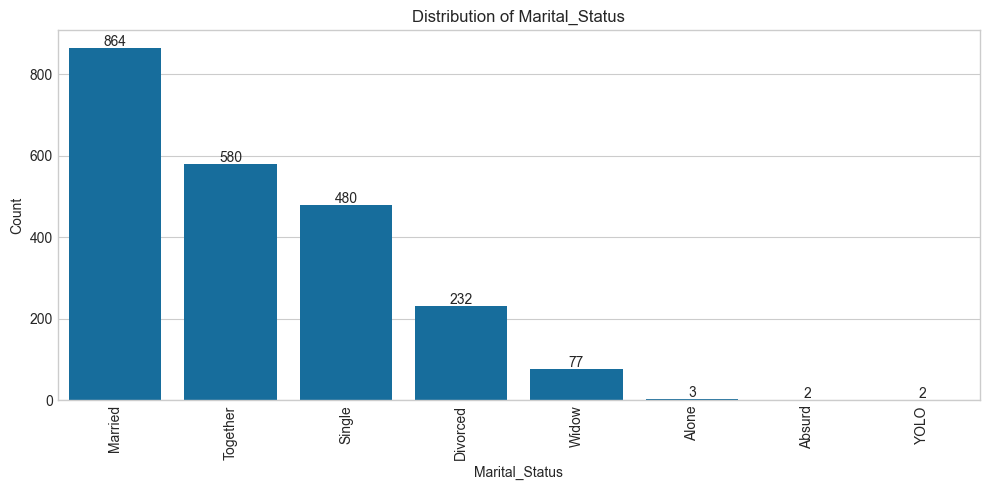

Percentage distribution of Marital_Status:
Married: 38.57%
Together: 25.89%
Single: 21.43%
Divorced: 10.36%
Widow: 3.44%
Alone: 0.13%
Absurd: 0.09%
YOLO: 0.09%

--------------------------------------------------



In [19]:
# Analyze distributions of categorical features
for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(10, 5))
        value_counts = df[col].value_counts().sort_values(ascending=False)
        
        # Plot distribution
        ax = sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=90)
        plt.xlabel(col)
        plt.ylabel('Count')
        
        # Add value labels on top of each bar
        for i, v in enumerate(value_counts.values):
            ax.text(i, v + 5, str(v), ha='center')
            
        plt.tight_layout()
        plt.show()
        
        # Print percentage distribution
        percent_dist = df[col].value_counts(normalize=True).sort_values(ascending=False) * 100
        print(f"Percentage distribution of {col}:")
        for idx, val in enumerate(percent_dist):
            print(f"{percent_dist.index[idx]}: {val:.2f}%")
        print("\n" + "-"*50 + "\n")

## Numerical Data Analysis

In [20]:
# Identify numerical columns (excluding IDs or other non-relevant columns)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
exclude_cols = ['ID'] # Add other columns to exclude if necessary
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]
print(f"Numerical columns: {numerical_cols}")

Numerical columns: ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


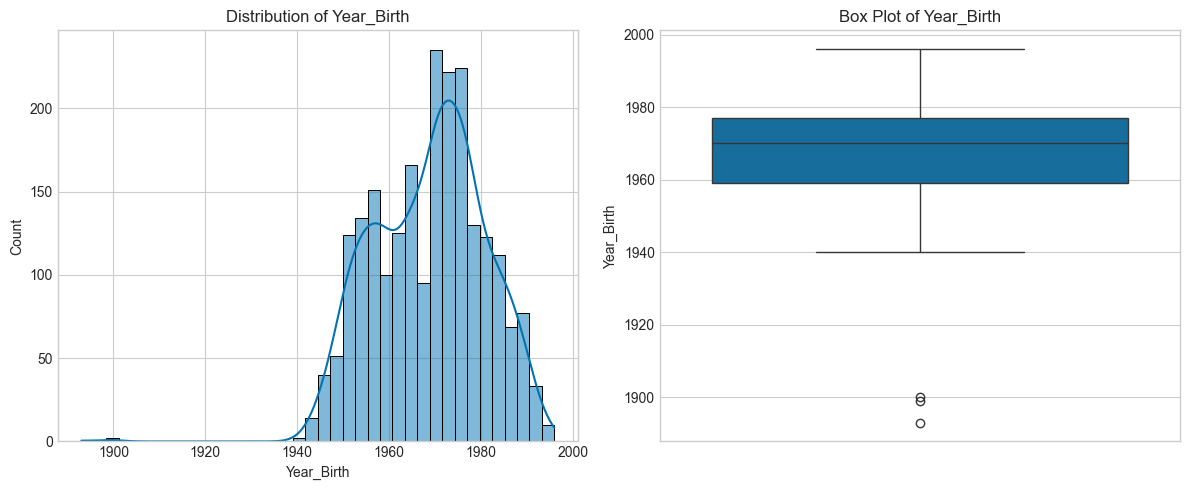

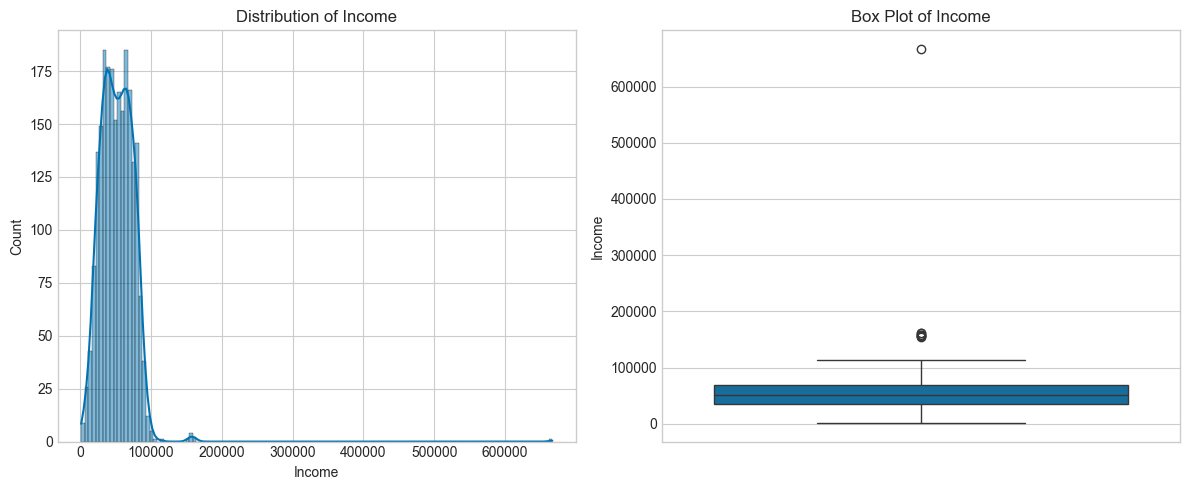

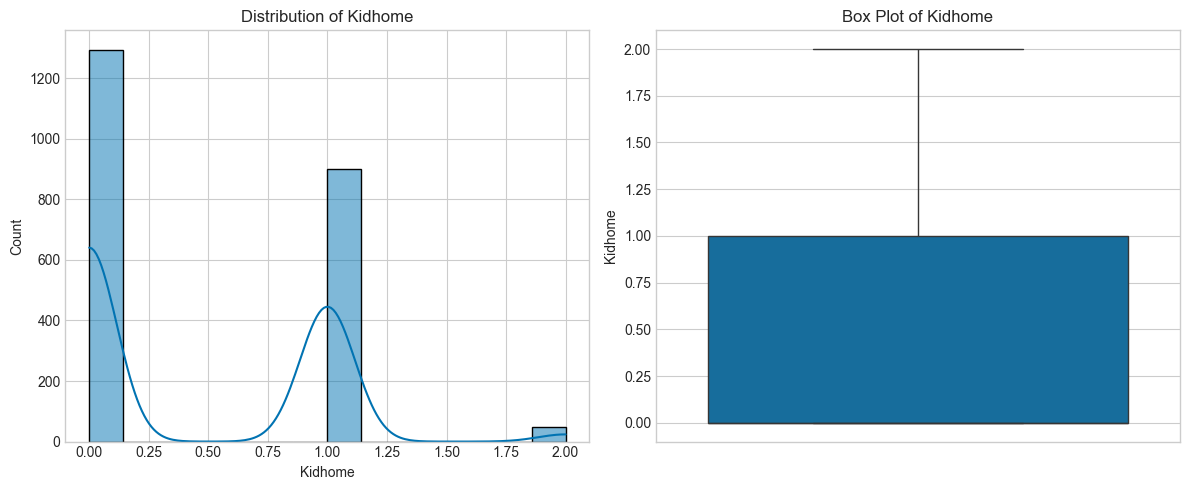

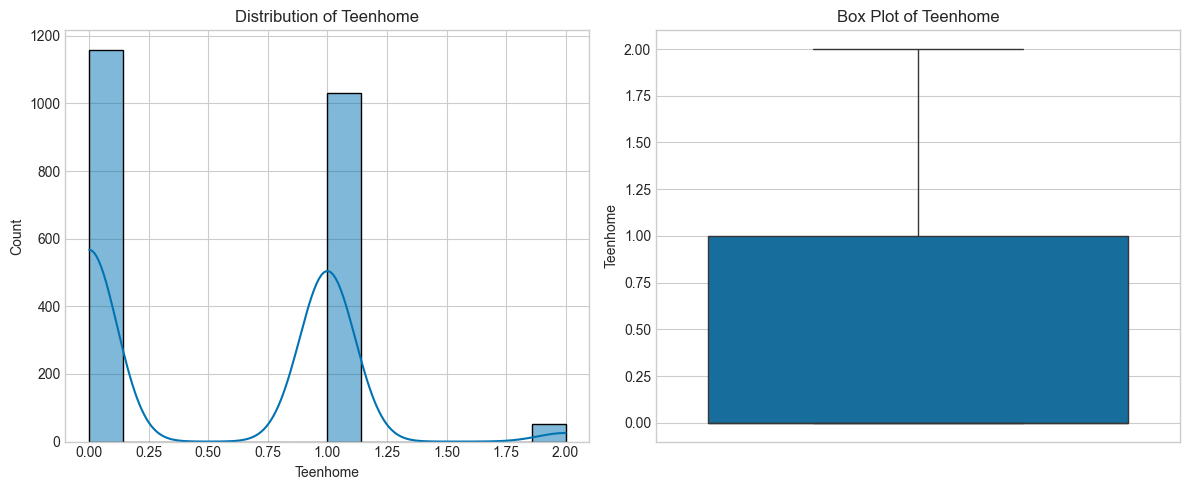

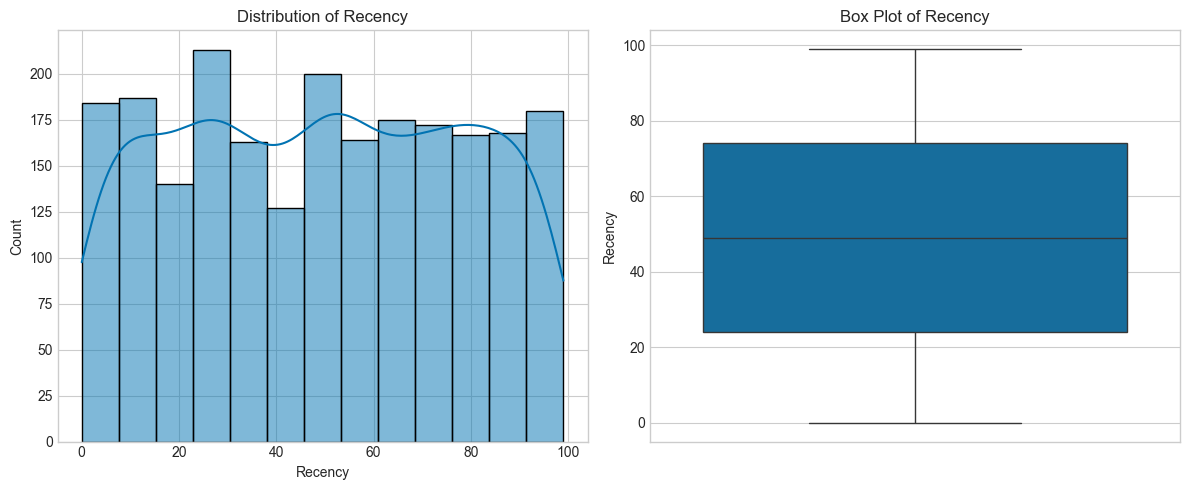

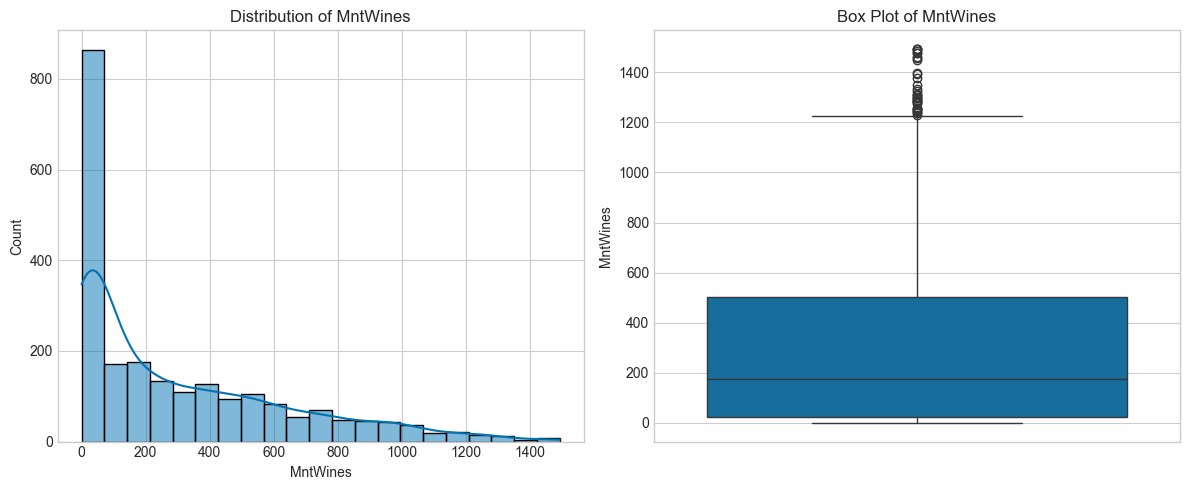

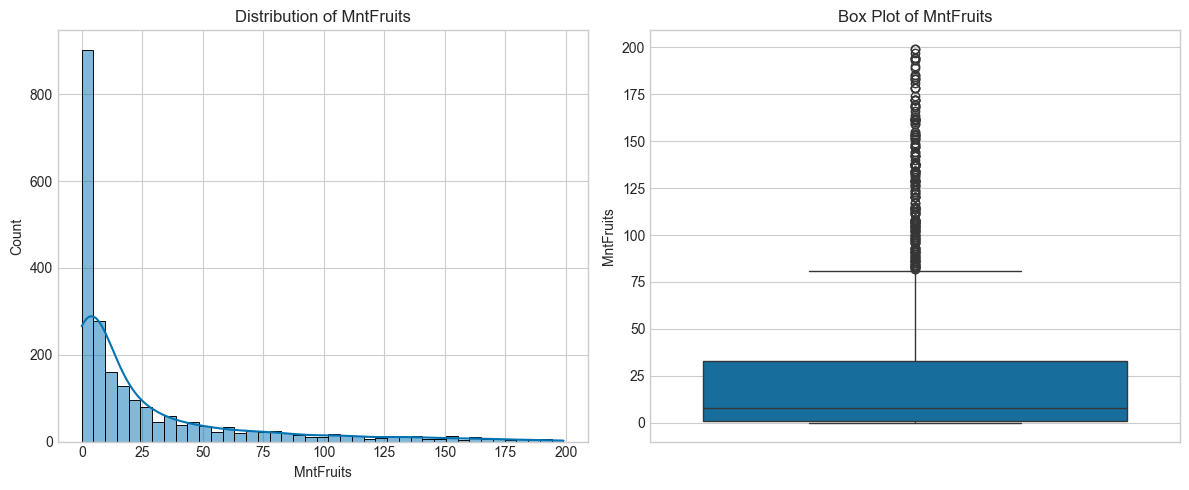

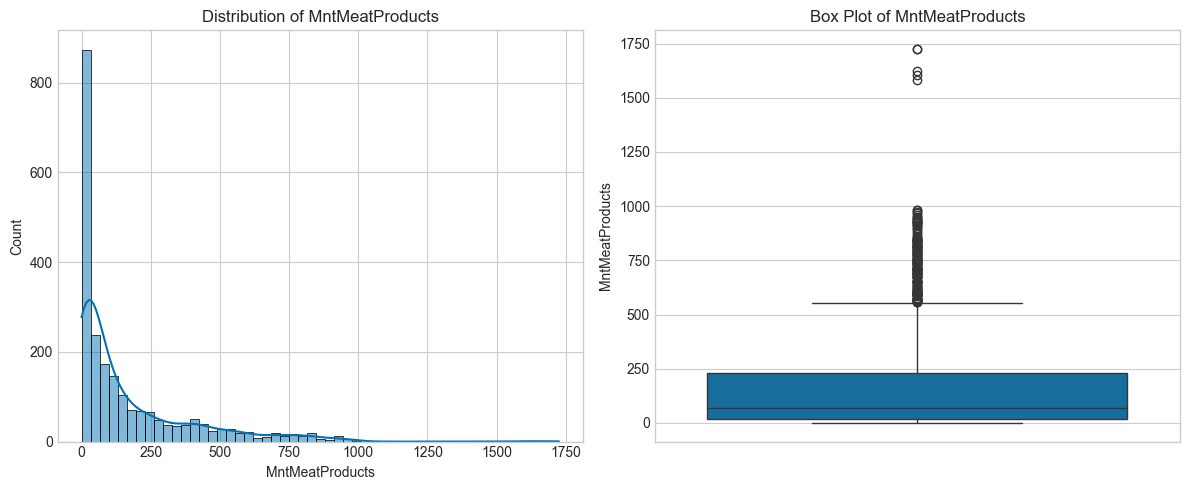

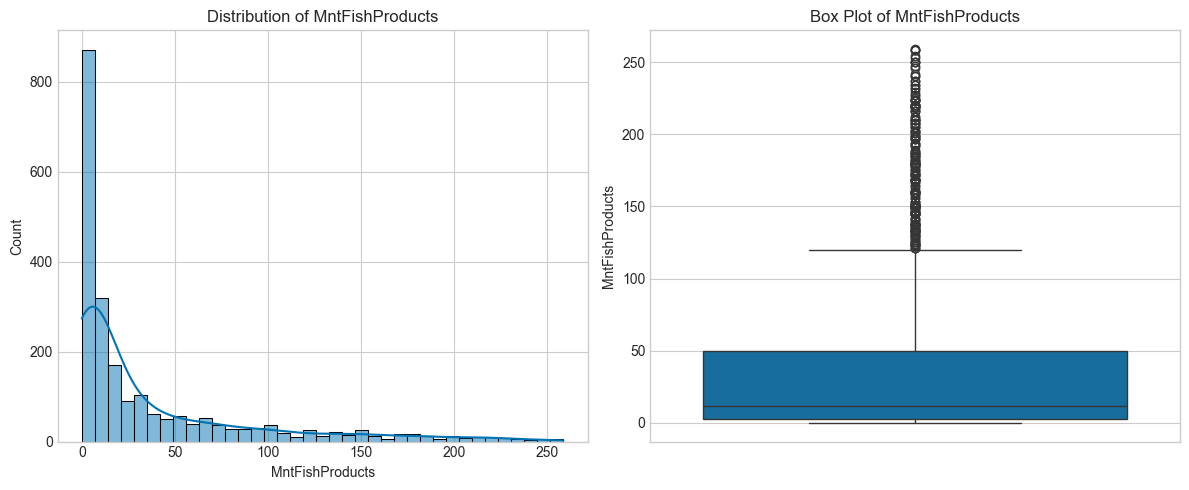

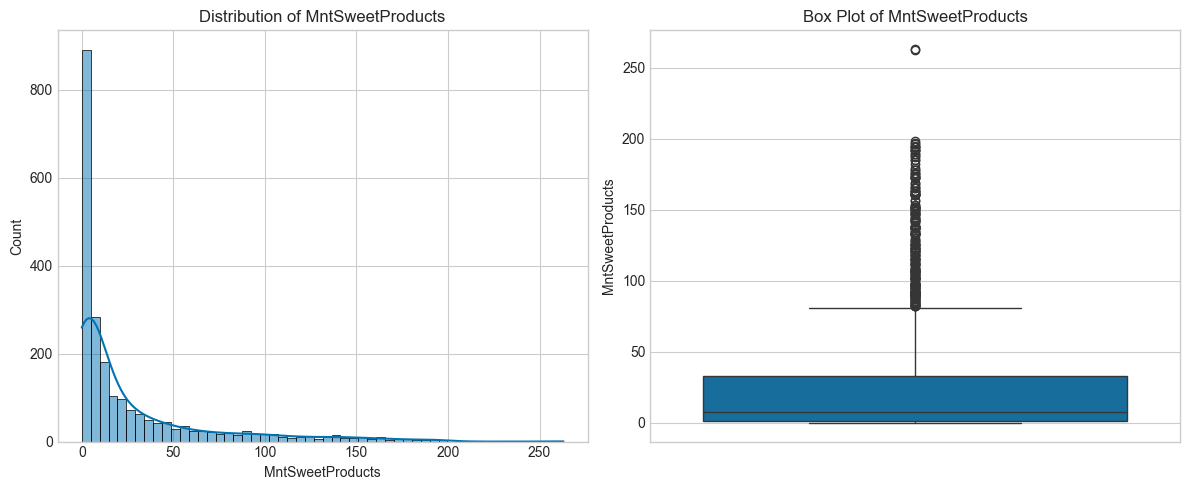

In [21]:
# Visualize distributions of numerical features
for col in numerical_cols[:10]: # Limit to first 10 for brevity
    plt.figure(figsize=(12, 5))
    
    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    
    plt.tight_layout()
    plt.show()

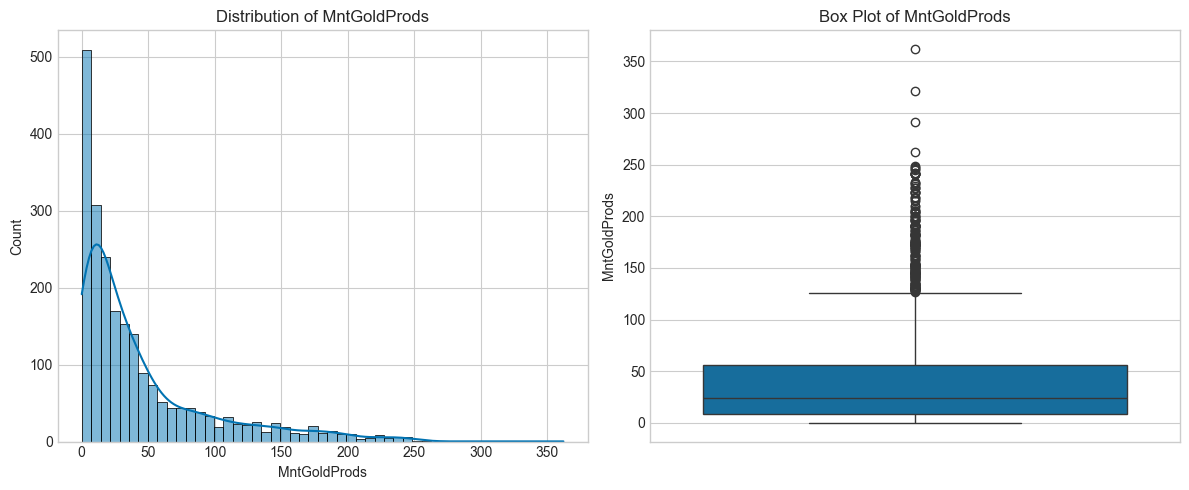

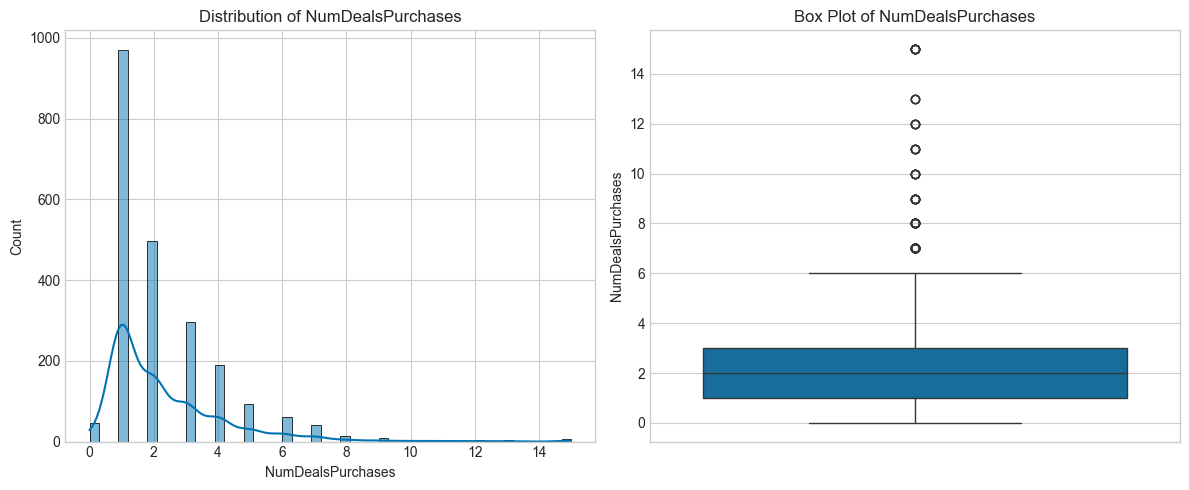

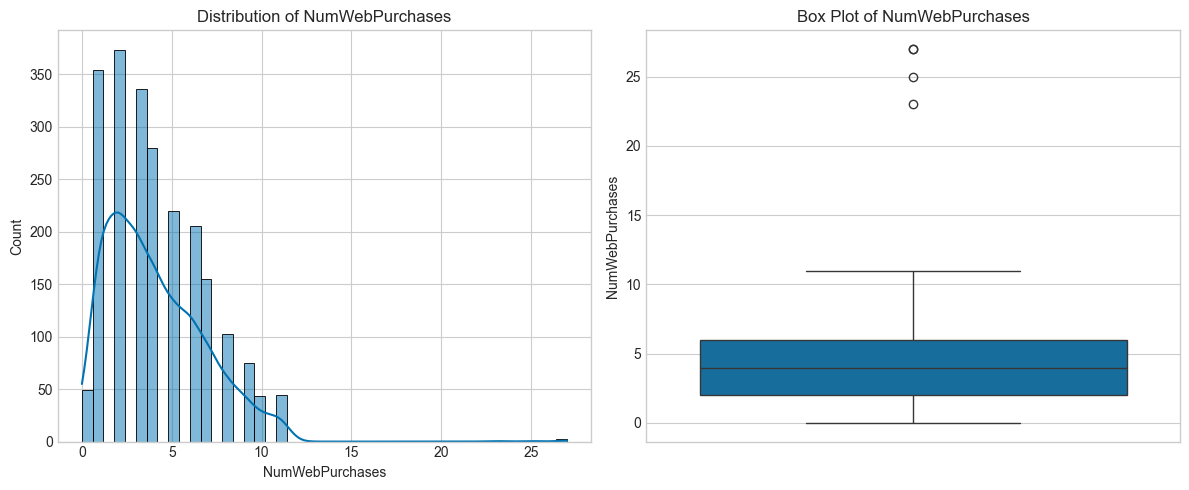

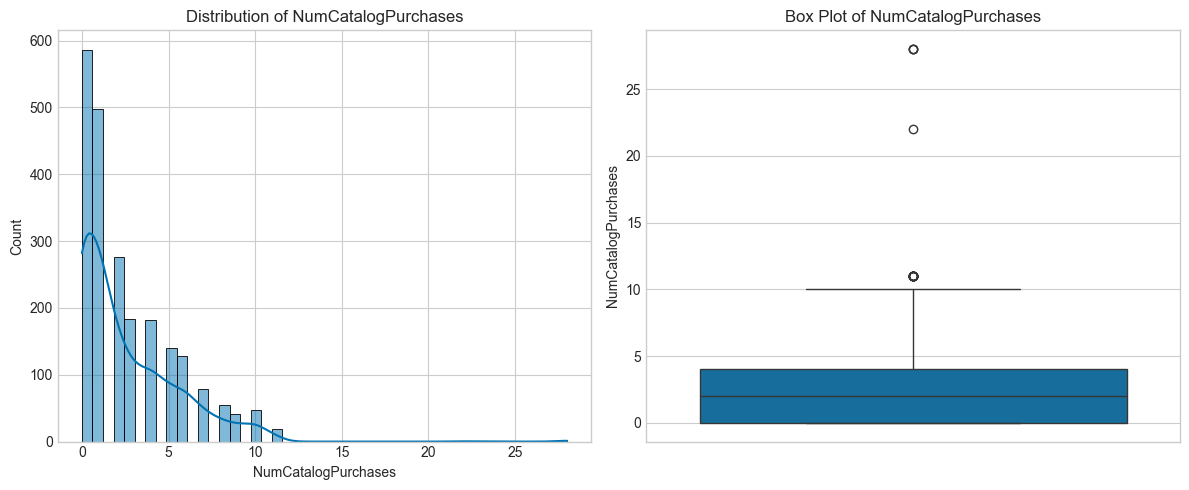

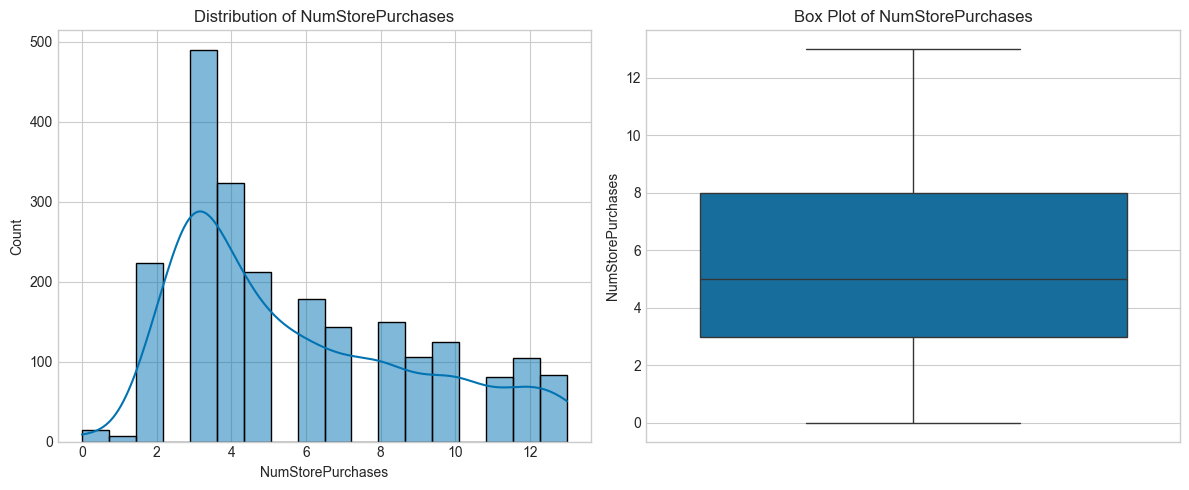

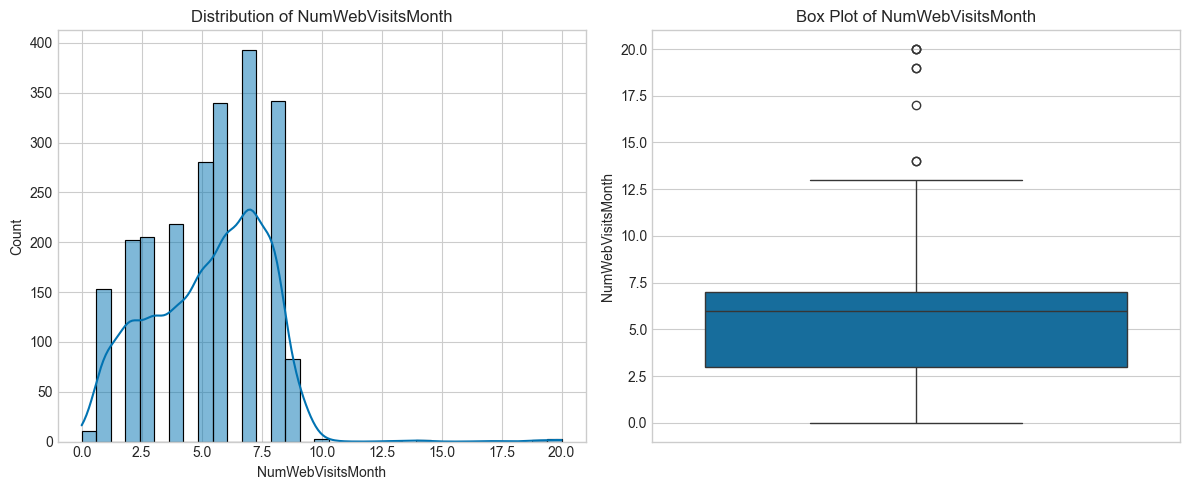

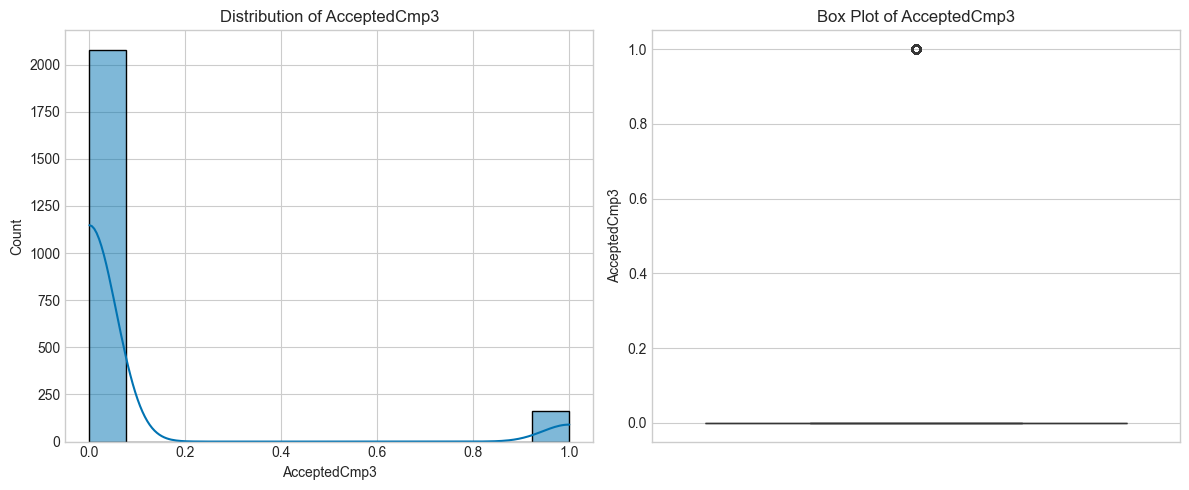

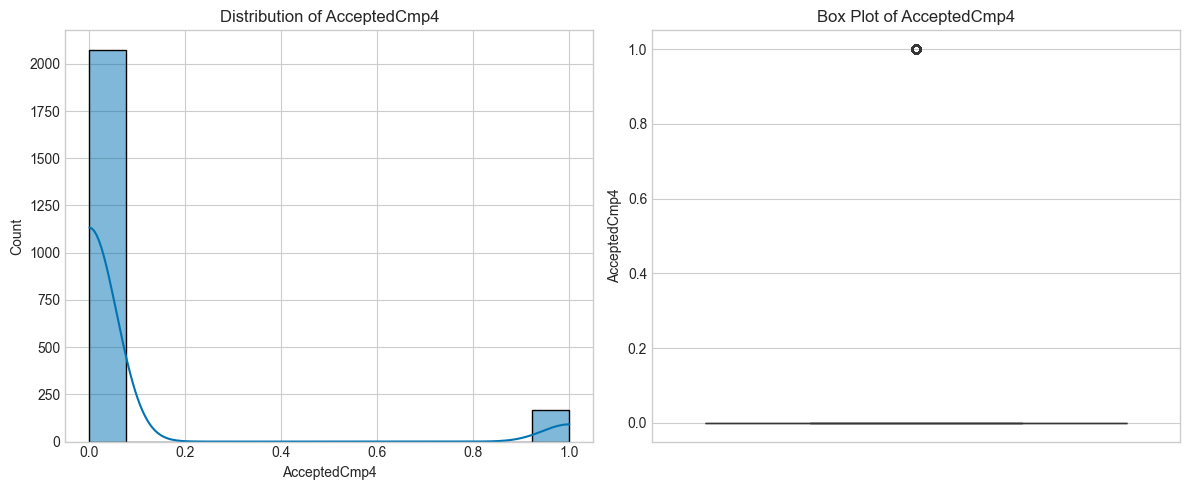

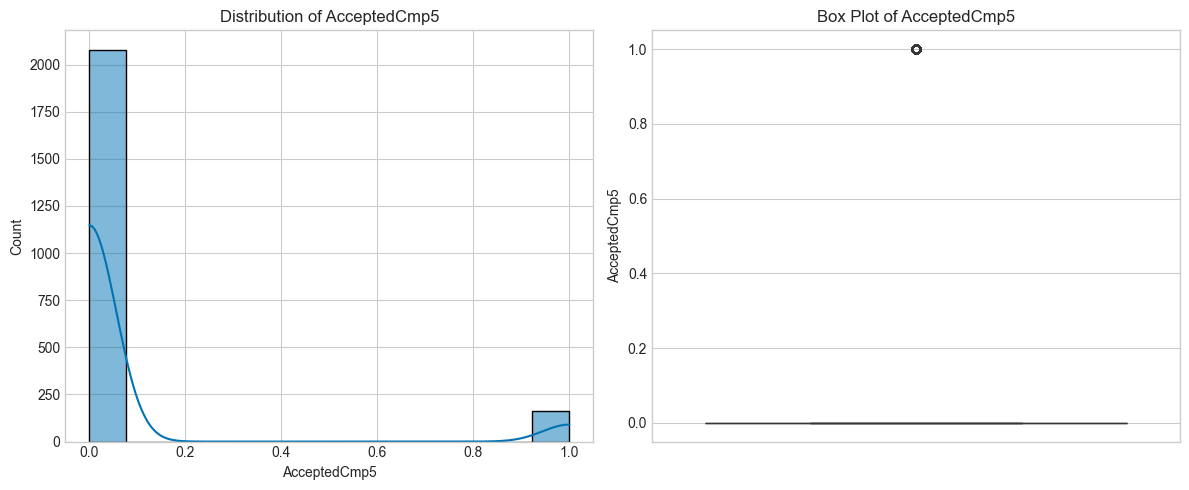

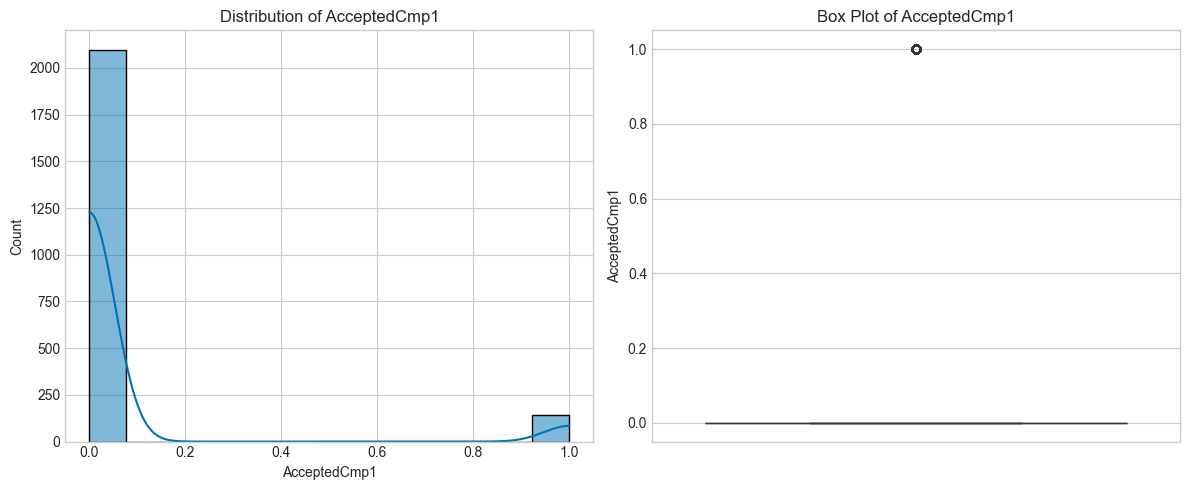

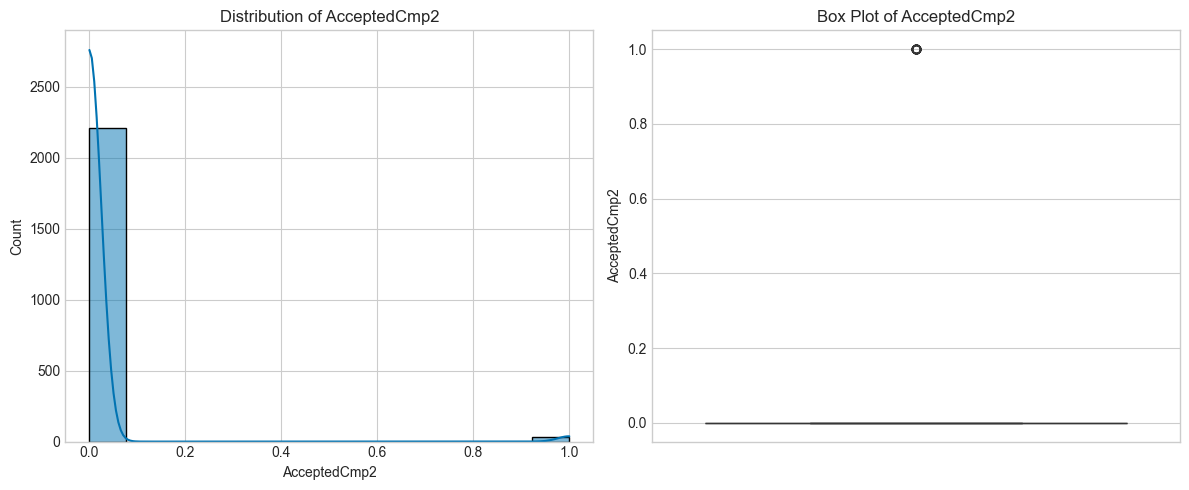

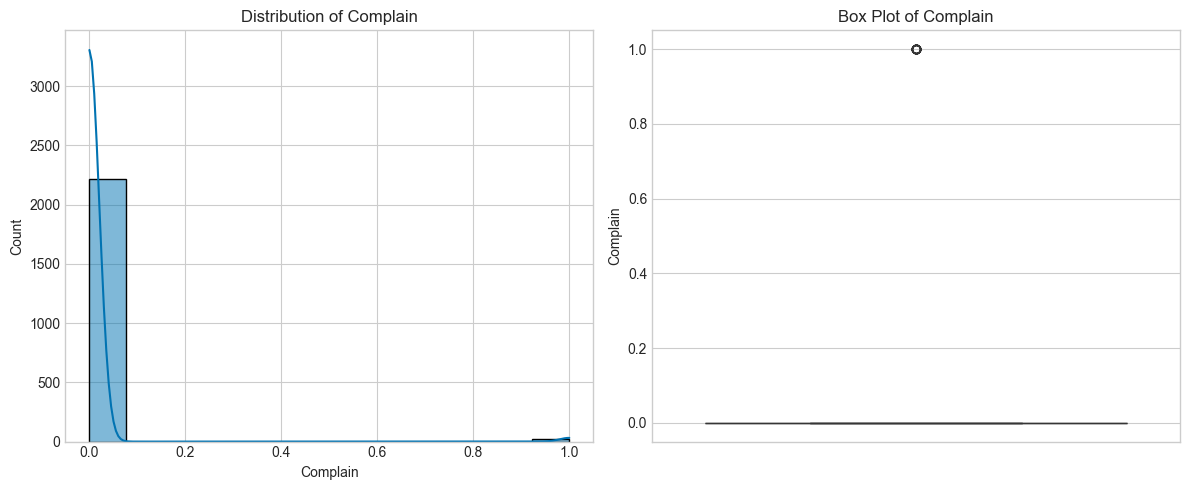

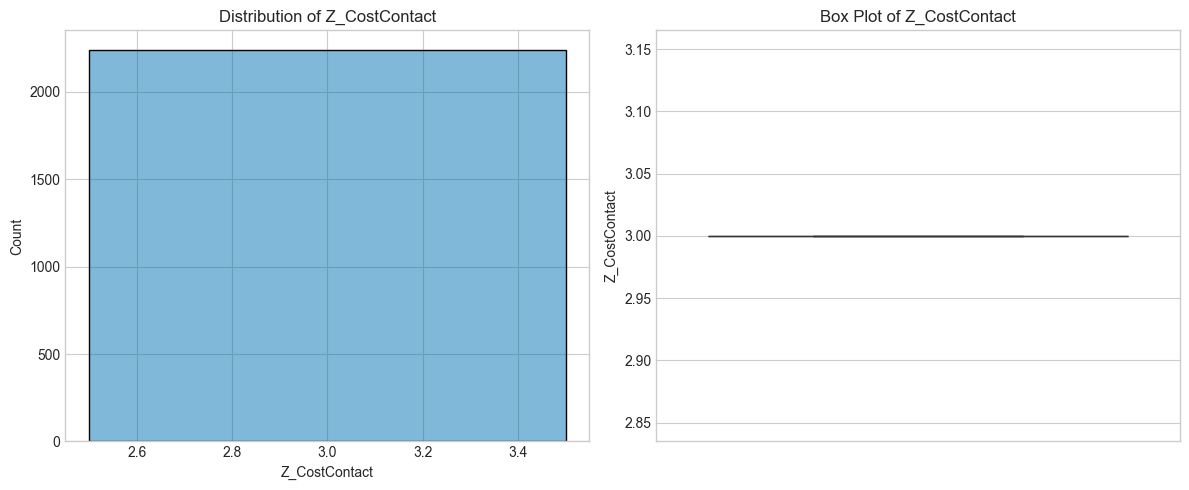

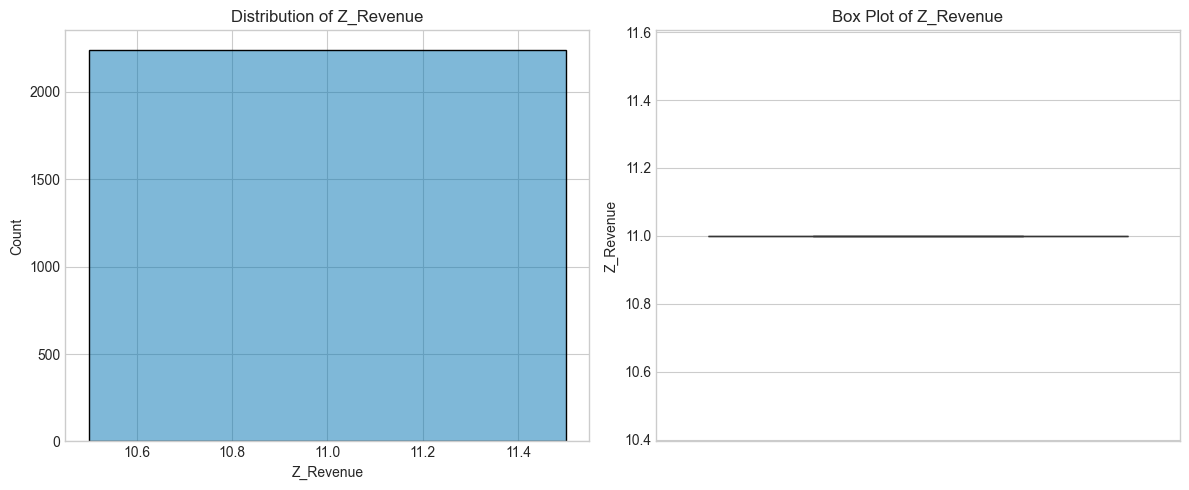

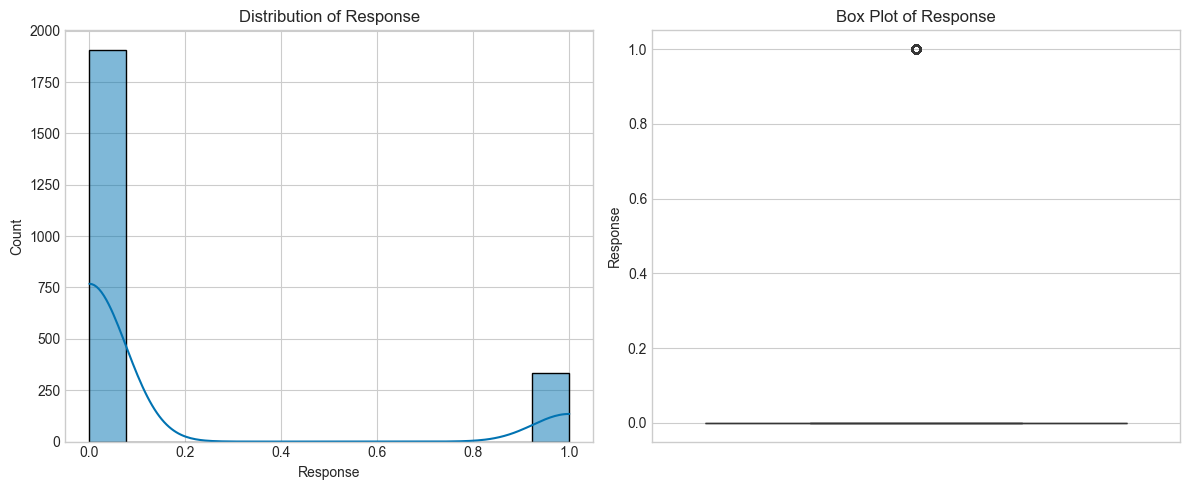

In [22]:
# Check for remaining numerical columns if any
if len(numerical_cols) > 10:
    for col in numerical_cols[10:]:
        plt.figure(figsize=(12, 5))
        
        # Histogram with KDE
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        
        # Box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Box Plot of {col}')
        
        plt.tight_layout()
        plt.show()

## Correlation Analysis

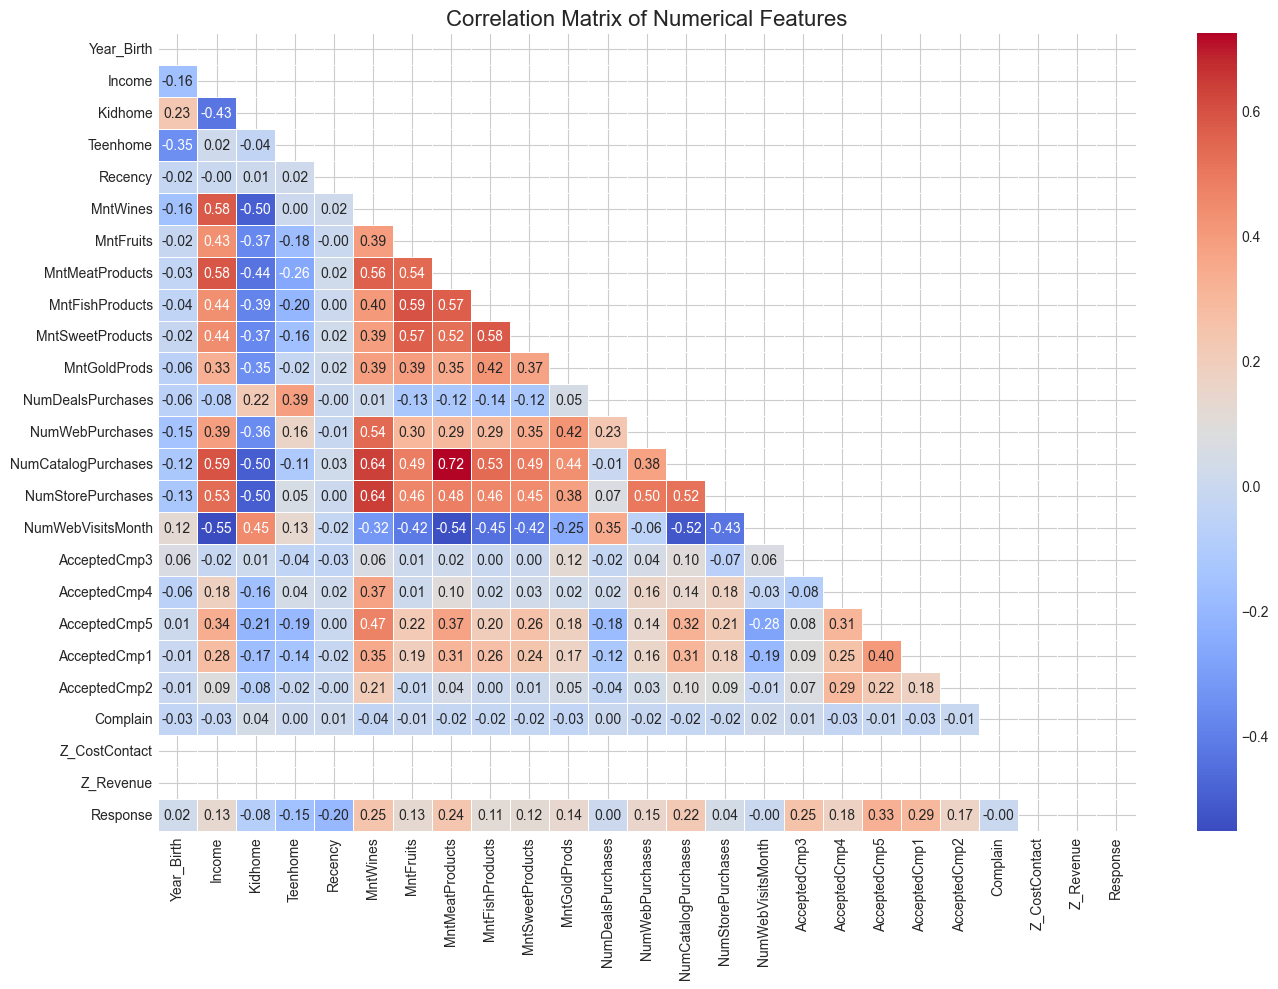

In [23]:
# Calculate correlation matrix
correlation = df[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [24]:
# Extract the top correlations (positive and negative)
corr_matrix = correlation.unstack()
corr_matrix = corr_matrix.sort_values(ascending=False)
corr_matrix = corr_matrix[corr_matrix != 1.0] # Remove self correlations

# Show top 10 positive correlations
print("Top 10 Positive Correlations:")
print(corr_matrix.head(10))

# Show top 10 negative correlations
print("\nTop 10 Negative Correlations:")
print(corr_matrix.tail(10))

Top 10 Positive Correlations:
NumCatalogPurchases  MntMeatProducts       0.72
MntMeatProducts      NumCatalogPurchases   0.72
NumStorePurchases    MntWines              0.64
MntWines             NumStorePurchases     0.64
                     NumCatalogPurchases   0.64
NumCatalogPurchases  MntWines              0.64
MntFruits            MntFishProducts       0.59
MntFishProducts      MntFruits             0.59
Income               NumCatalogPurchases   0.59
NumCatalogPurchases  Income                0.59
dtype: float64

Top 10 Negative Correlations:
Z_Revenue  AcceptedCmp4    NaN
           AcceptedCmp5    NaN
           AcceptedCmp1    NaN
           AcceptedCmp2    NaN
           Complain        NaN
           Z_CostContact   NaN
           Z_Revenue       NaN
           Response        NaN
Response   Z_CostContact   NaN
           Z_Revenue       NaN
dtype: float64


## Feature Relationships

/Users/macbook/Documents/k-mean/customer_segmentation/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/qc/0kfkn55s1l54y40cndd1yk1h0000gn/T/ipykernel_31617/1392054807.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1200x1000 with 0 Axes>

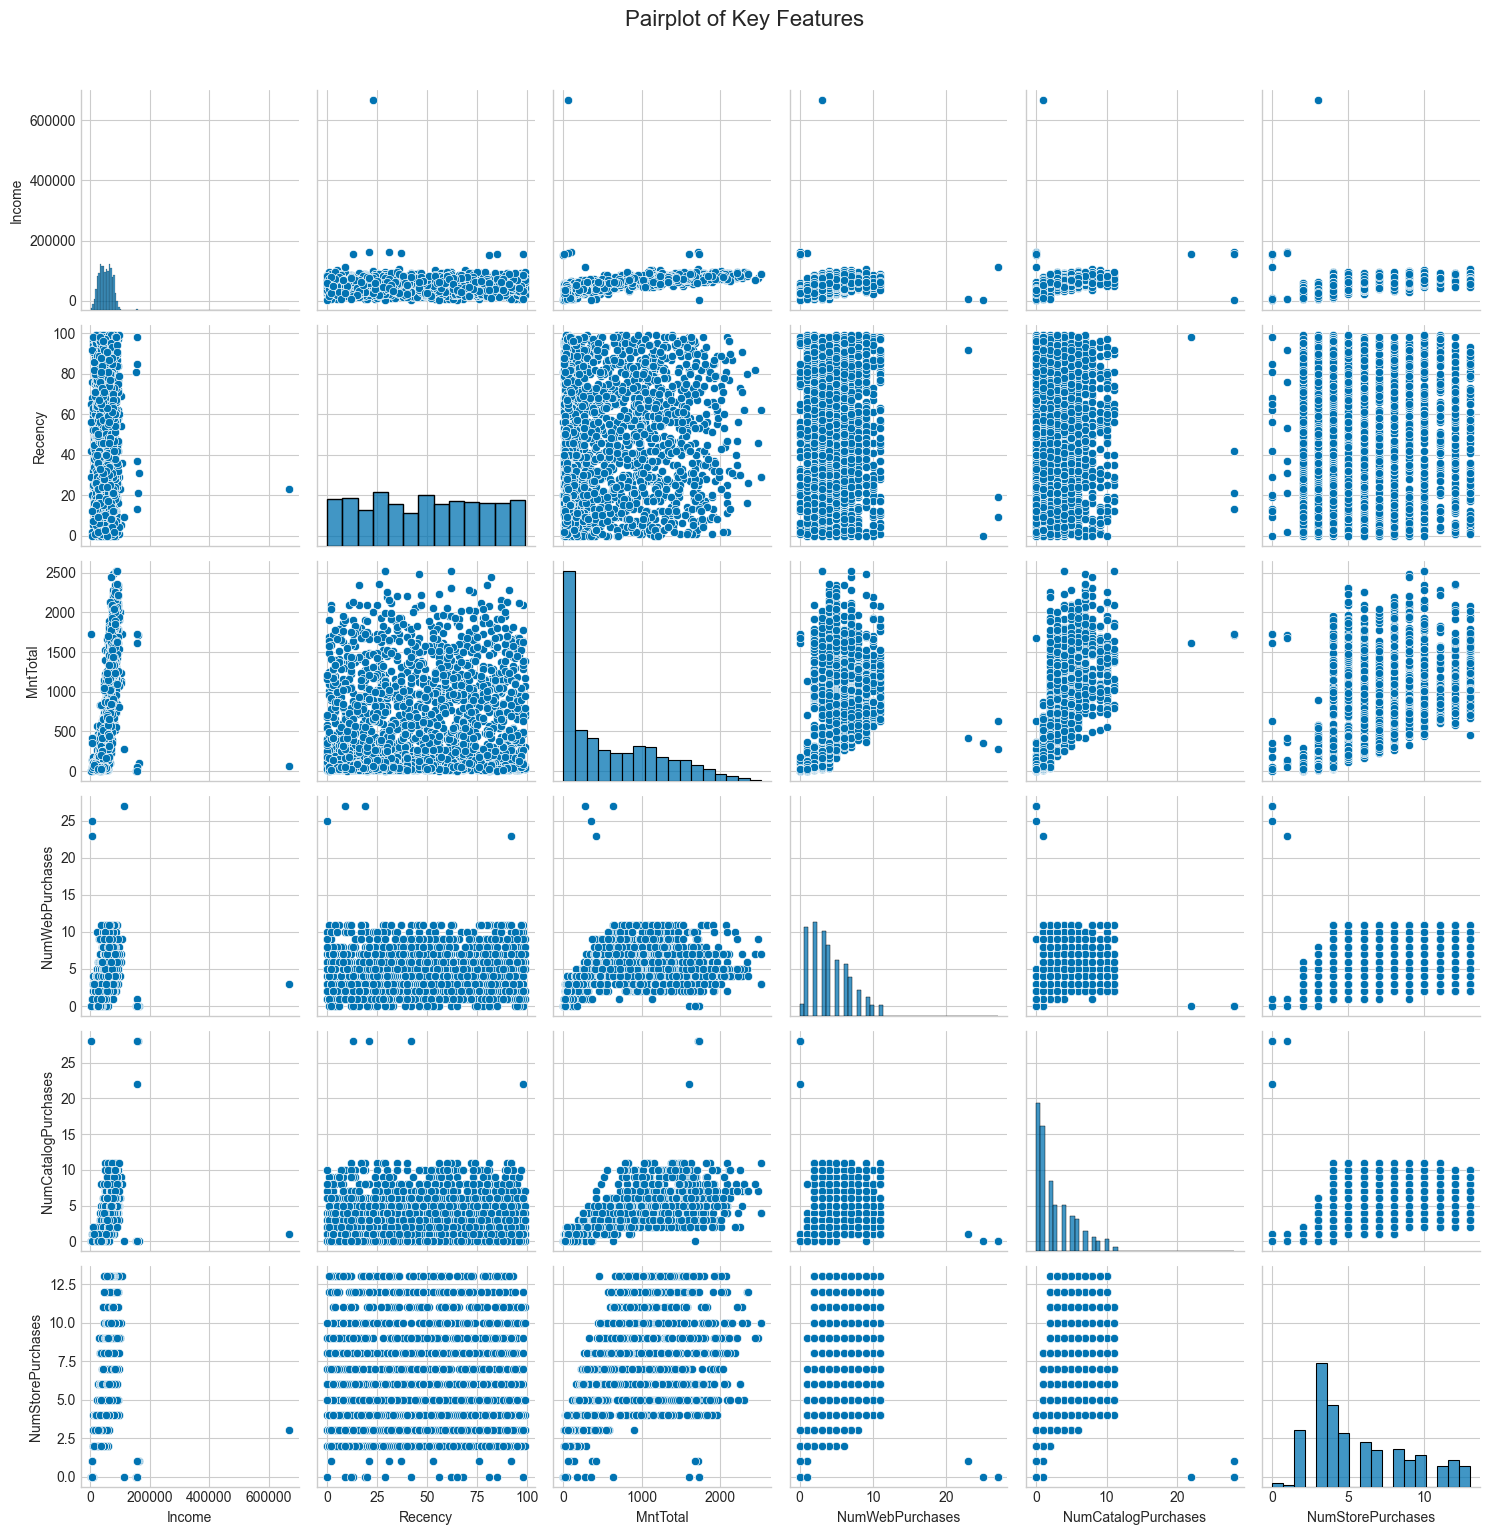

In [25]:
# Select a subset of numerical columns for pairplot to avoid overcrowding
# We'll choose columns that might be most relevant for customer segmentation
relevant_cols = ['Income', 'Age', 'Recency', 'MntTotal', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Create Total spending column if not already present
if 'MntTotal' not in df.columns and all(col in df.columns for col in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']):
    df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Filter out columns that don't exist in the dataframe
relevant_cols = [col for col in relevant_cols if col in df.columns]

# Create pairplot
if len(relevant_cols) > 0:
    plt.figure(figsize=(12, 10))
    sns.pairplot(df[relevant_cols])
    plt.suptitle('Pairplot of Key Features', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

## Customer Purchase Behavior Analysis

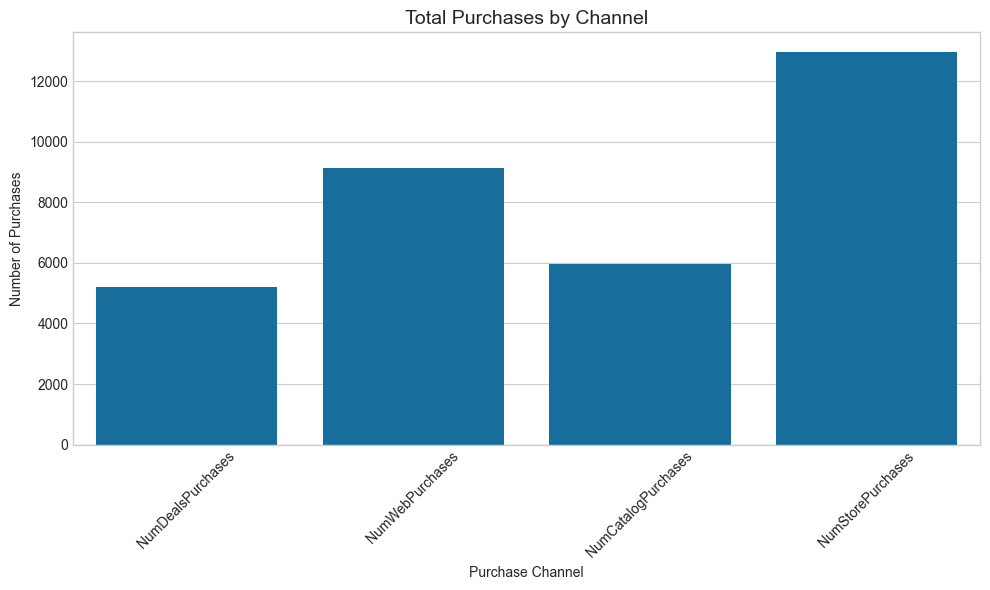

In [26]:
# Create stacked bar chart for purchase channels
purchase_cols = [col for col in df.columns if col.startswith('Num') and 'Purchases' in col]
purchase_data = df[purchase_cols].sum()

if len(purchase_cols) > 0:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=purchase_data.index, y=purchase_data.values)
    plt.title('Total Purchases by Channel', fontsize=14)
    plt.ylabel('Number of Purchases')
    plt.xlabel('Purchase Channel')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

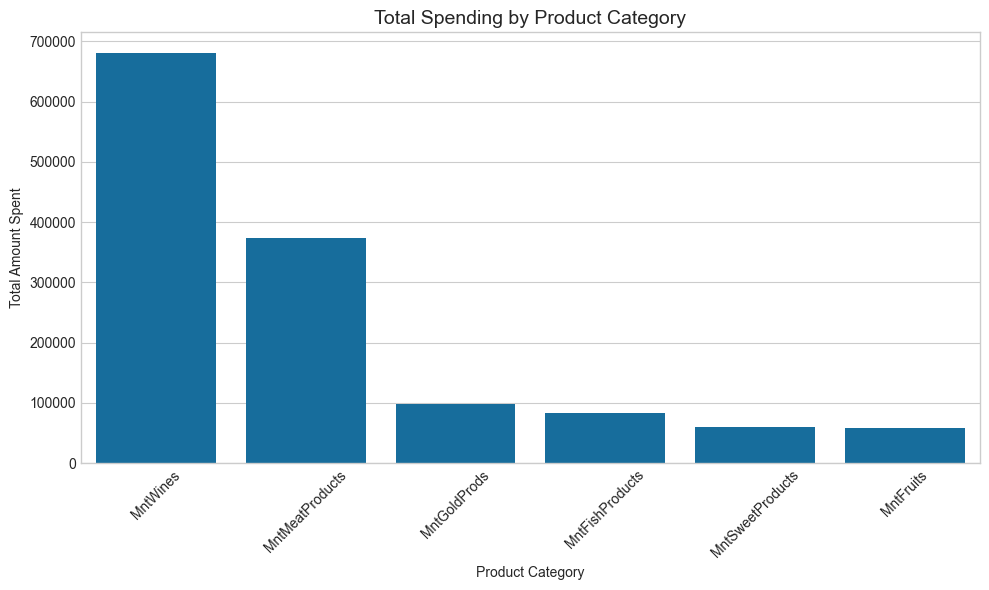

In [27]:
# Analyze product category preferences
product_cols = [col for col in df.columns if col.startswith('Mnt') and col != 'MntTotal']
product_data = df[product_cols].sum().sort_values(ascending=False)

if len(product_cols) > 0:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=product_data.index, y=product_data.values)
    plt.title('Total Spending by Product Category', fontsize=14)
    plt.ylabel('Total Amount Spent')
    plt.xlabel('Product Category')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Preliminary Segmentation Analysis

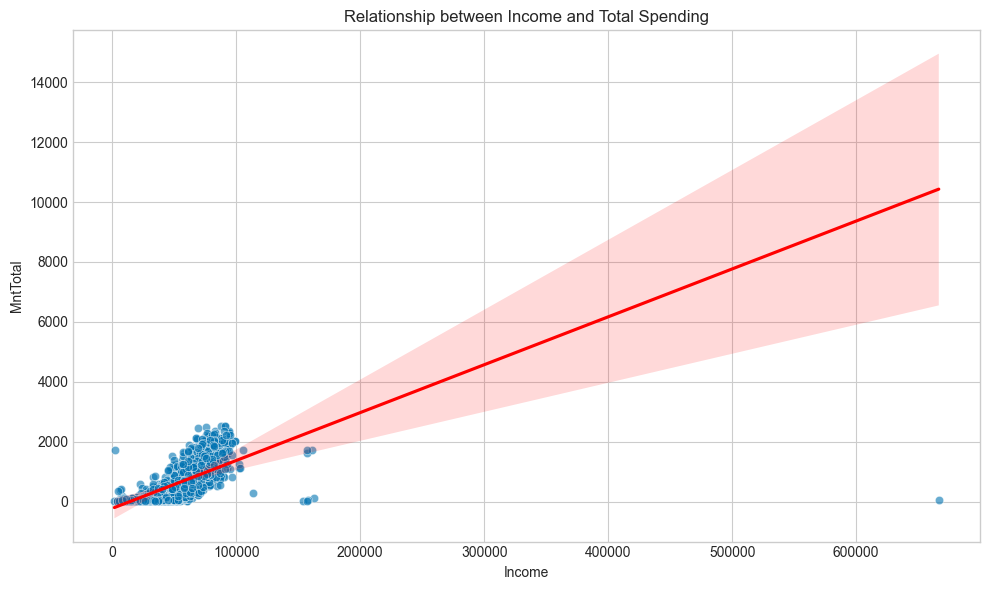

In [28]:
# Relationship between Income and Total Spending
if 'Income' in df.columns and 'MntTotal' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Income', y='MntTotal', data=df, alpha=0.6)
    plt.title('Relationship between Income and Total Spending')
    plt.xlabel('Income')
    plt.ylabel('Total Spending')
    # Add regression line
    sns.regplot(x='Income', y='MntTotal', data=df, scatter=False, color='red')
    plt.tight_layout()
    plt.show()

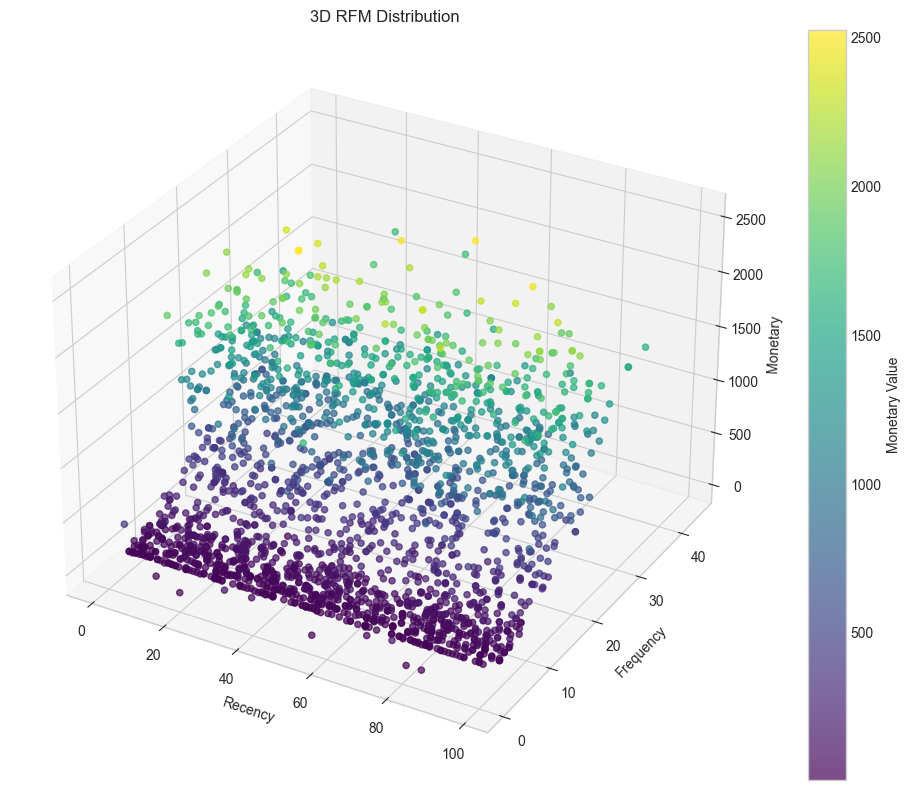

In [29]:
# Potential segmentation based on recency, frequency, and monetary value (RFM)

# Check if we can create RFM features
required_cols = ['Recency']
frequency_cols = [col for col in df.columns if col.startswith('Num') and 'Purchases' in col]
monetary_cols = [col for col in df.columns if col.startswith('Mnt') and col != 'MntTotal']

if all(col in df.columns for col in required_cols) and len(frequency_cols) > 0 and len(monetary_cols) > 0:
    # Create RFM features
    rfm_df = pd.DataFrame()
    rfm_df['Recency'] = df['Recency']
    rfm_df['Frequency'] = df[frequency_cols].sum(axis=1)
    
    if 'MntTotal' in df.columns:
        rfm_df['Monetary'] = df['MntTotal']
    else:
        rfm_df['Monetary'] = df[monetary_cols].sum(axis=1)
    
    # Visualize RFM distribution in 3D scatter plot
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the points
    scatter = ax.scatter(rfm_df['Recency'], 
              rfm_df['Frequency'], 
              rfm_df['Monetary'],
              c=rfm_df['Monetary'], 
              cmap='viridis', 
              alpha=0.7)
    
    # Add labels and title
    ax.set_xlabel('Recency')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Monetary')
    ax.set_title('3D RFM Distribution')
    
    # Add color bar
    plt.colorbar(scatter, ax=ax, label='Monetary Value')
    
    plt.tight_layout()
    plt.show()

## Summary of Findings

Based on the exploratory data analysis, here are the key insights for customer segmentation:

1. **Data Quality**: [Fill in based on missing value analysis]
2. **Customer Demographics**: [Fill in based on demographic features analysis]
3. **Purchase Behavior**: [Fill in based on purchase channel and amount analysis]
4. **Product Preferences**: [Fill in based on product category analysis]
5. **Potential Segments**: [Identify natural clusters or segments observed in the data]
6. **Key Relationships**: [Note important correlations and relationships between features]

### Next Steps

1. Feature Engineering for better segmentation
2. Apply clustering algorithms (K-Means, Hierarchical Clustering)
3. Evaluate cluster quality and interpretability
4. Develop customer profiles based on segments